# A very basic example
This notebooks shows the basic mechanics of the package on a toy model with a few variables

In [1]:
using BeliefPropagation, FactorGraphs

Construct a small factor graph from an adjacency matrix: rows correspond to factors, columns to variables. $A_{a, i}$ is one if variable $i$ is involved in factor $a$, zero otherwise.
Here we have 3 factors and 4 variables.

In [2]:
A = [0 1 1 0;
     1 0 1 0;
     0 0 1 1]
g = FactorGraph(A)

FactorGraph{Int64} with 4 variables, 3 factors, and 6 edges


Take a look at the factor graph

(This cell is commented out by default because loading Plots for the first time can take a few seconds)

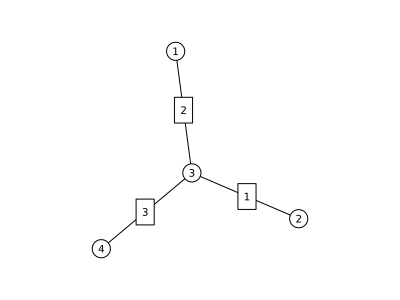

In [14]:
# using Plots, GraphRecipes
# plot(g, size=(400,300), shownames=true)

Specify the number of states (values) that each variable can take

In [4]:
states = [3, 2, 2, 4];

Construct the factors by explicitly providing the values taken for every combination of the inputs

In [5]:
ψ₁ = BPFactor([1.1 0.3;
               0.5 2.5])
ψ₂ = BPFactor([1.0 0.3;
               2.3 1.0;
               0.0 1.2])
ψ₃ = BPFactor([0.8 0.0 0.1 0.9;
               0.0 2.9 0.7 1.1])
ψ = [ψ₁, ψ₂, ψ₃];

Initialize an instance of the `BP` type

In [6]:
bp = BP(g, ψ, states);

Iterate the BP algorithm for `maxiter` iterations or until the maximum variation in messages between two succesive iterations is less than `tol`

In [7]:
iters = iterate!(bp; maxiter=10, tol=1e-12)
println("BP converged in $iters iterations")

BP converged in 2 iterations


Compute single-variable marginals ("beliefs") $p(x_i)$ $\forall i$

In [8]:
b = beliefs(bp)

4-element Vector{Vector{Float64}}:
 [0.16102254504292052, 0.4665597585133479, 0.3724176964437317]
 [0.23721818696349403, 0.7627818130365058]
 [0.224129799075559, 0.7758702009244409]
 [0.09961324403358177, 0.47872842184699554, 0.12800679181209318, 0.29365154230732954]

Compute factor marginals $p(\underline{x}_a)$ $\forall a$

In [9]:
fb = factor_beliefs(bp)

3-element Vector{Matrix{Float64}}:
 [0.1540892368644468 0.08312895009904726; 0.07004056221111217 0.6927412508253938]
 [0.06791812093198757 0.0931044241109329; 0.15621167814357137 0.3103480803697764; 0.0 0.3724176964437316]
 [0.09961324403358177 0.0 0.01245165550419772 0.11206489953777948; 0.0 0.47872842184699554 0.11555513630789548 0.18158664276955006]

Compute the normalization constant $Z$ and compare with the result of an exhaustive computation

In [10]:
f_bethe = bethe_free_energy(bp)
z_bethe = exp(-f_bethe)

42.40399999999995

In [11]:
z = sum(ψ₁([x₂,x₃]) * ψ₂([x₁, x₃]) * ψ₃([x₃, x₄])
    for x₁ in 1:3, x₂ in 1:2, x₃ in 1:2, x₄ in 1:4)

42.40399999999999